In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

In [2]:
# Read CSV
study_results_df = pd.read_csv('data/Study_results.csv')
study_results_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
mouse_meta_df = pd.read_csv('data/Mouse_metadata.csv')
mouse_meta_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
# check for mouse ID with duplicate time points ... remove any data associated with that mouse ID
study_results_df.duplicated(subset=['Timepoint', 'Mouse ID']).sum()

dupes = study_results_df[study_results_df.duplicated(subset=['Mouse ID','Timepoint'])]
dupes
#dupes['Mouse ID'].unique()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [5]:
# Dom's suggestion at office hours
clean_study_results_df = study_results_df.loc[study_results_df['Mouse ID']!=dupes.iloc[0,0]]
clean_study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Join dataframes for next
#mouse_meta_df.join(study_results_df,on='Mouse ID', how="inner")
new_df = clean_study_results_df.merge(mouse_meta_df, how='inner', left_on='Mouse ID', right_on='Mouse ID', suffixes=('l_','r_'))
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# first attempt at a summary statistics table, SEE BELOW 
drug_groups_describe = pd.DataFrame(new_df.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].describe())

drug_groups_describe

count       mean       std        min        25%  \
Drug Regimen Timepoint                                                     
Capomulin    0           25.0  45.000000  0.000000  45.000000  45.000000   
             5           25.0  44.266086  2.242964  38.796474  43.180977   
             10          25.0  43.084291  3.513422  35.624403  39.952347   
             15          24.0  42.064317  4.108369  32.623003  39.713398   
             20          23.0  40.716325  4.362915  30.485985  38.240746   
...                       ...        ...       ...        ...        ...   
Zoniferol    25          16.0  55.432935  2.410052  50.970689  54.469040   
             30          15.0  57.713531  3.098552  52.747718  56.413780   
             35          14.0  60.089372  3.297993  54.810813  57.871585   
             40          14.0  62.916692  3.736102  56.994816  60.991445   
             45          14.0  65.960888  3.755037  60.752704  62.618149   

                              50%        75%        max  
Drug Regimen Timepoint                                   
Capomulin    0          45.000000  45.000000  45.000000  
             5          45.597064  45.760886  45.895647  
             10         43.421014  46.408361  46.759074  
             15         42.798160  44.634897  47.488599  
             20         40.716428  43.596783  48.158209  
...                           ...        ...        ...  
Zoniferol    25         55.676604  56.819402  60.253481  
             30         57.419744  58.710803  65.893986  
             35         60.365832  61.946127  66.742924  
             40         62.274543  64.524073  71.108118  
             45         65.684689  68.341763  73.324432  

[100 rows x 8 columns]

In [8]:
# Generate a summary statistics table consisting of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each drug regimen

drug_groups_df = pd.DataFrame(new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
drug_groups_df = drug_groups_df.rename(columns={'Tumor Volume (mm3)':'mean'})

drug_median = pd.DataFrame(new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
drug_median = drug_median.rename(columns={'Tumor Volume (mm3)':'median'})
drug_groups_df = pd.concat([drug_groups_df, drug_median], axis=1)

drug_var = pd.DataFrame(new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
drug_var = drug_var.rename(columns={'Tumor Volume (mm3)':'var'})
drug_groups_df = pd.concat([drug_groups_df, drug_var], axis=1)

drug_std = pd.DataFrame(new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
drug_std = drug_std.rename(columns={'Tumor Volume (mm3)':'std'})
drug_groups_df = pd.concat([drug_groups_df, drug_std], axis=1)

drug_sem = pd.DataFrame(new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
drug_sem = drug_sem.rename(columns={'Tumor Volume (mm3)':'sem'})
drug_groups_df = pd.concat([drug_groups_df, drug_sem], axis=1)
drug_groups_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


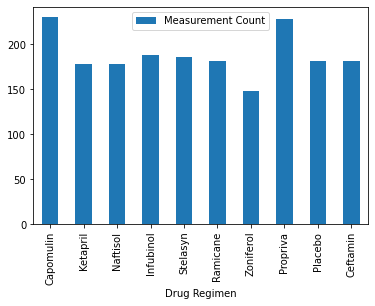

In [9]:
# Generate a bar plot that shows the total number of measurements taken for each treatment regimen thru-out the study
## using Panda's DataFrame.plot

drug_list = new_df['Drug Regimen'].unique()

measurement_count = new_df.groupby('Drug Regimen')['Mouse ID'].count()

df = pd.DataFrame({'Drug Regimen':drug_list,'Measurement Count':measurement_count})
ax = df.plot.bar(x='Drug Regimen', y='Measurement Count')

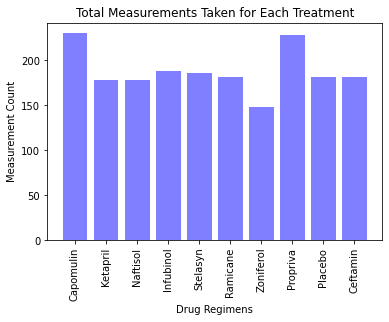

In [10]:
## using Matplotlib 'pyplot'

x_axis = np.arange(len(measurement_count))

plt.bar(x_axis, measurement_count, color='blue', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_list, rotation="vertical")
plt.title("Total Measurements Taken for Each Treatment")
plt.xlabel("Drug Regimens")
plt.ylabel("Measurement Count")
plt.show()

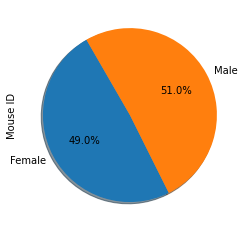

In [11]:
# Generate a pie plot that shows the distribution of female or male mice in the study
## using Pandas's DataFrame.plot()

new_df.groupby('Sex')['Mouse ID'].count().plot(kind='pie', y='Sex', shadow=True,  startangle=120, autopct='%1.1f%%')

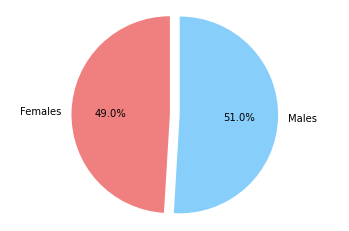

In [12]:
## using Matplotlib's 'pyplot'
sex = new_df.groupby('Sex').count()
labels = ["Females", "Males"]
sex_count = [922, 958]
explode = (0.1,0)
colors = ["lightcoral","lightskyblue"]
plt.pie(sex_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
## Capomulin, Ramicane, Infuibinol, and  Ceftamin

# Mouse ID, Timepoint =max?, Tumor volume, Drug Regimen
final_tumor_df = new_df[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

final_tumor_cap = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Capomulin']
final_tumor_cap = final_tumor_cap.loc[final_tumor_cap['Timepoint'] == final_tumor_cap['Timepoint'].max()]

final_tumor_cap

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
9,Capomulin,b128,45,38.982878
1677,Capomulin,r554,45,32.377357
1687,Capomulin,s185,45,23.343598
1697,Capomulin,b742,45,38.939633
1707,Capomulin,x401,45,28.484033
1717,Capomulin,l509,45,41.483008
1727,Capomulin,s710,45,40.728578
1741,Capomulin,u364,45,31.023923
1751,Capomulin,j119,45,38.125164
1761,Capomulin,v923,45,40.658124


In [14]:
final_tumor_ram = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Ramicane']
final_tumor_ram = final_tumor_ram.loc[final_tumor_ram['Timepoint'] == final_tumor_ram['Timepoint'].max()]

final_tumor_ram

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
460,Ramicane,j913,45,31.560470
470,Ramicane,a411,45,38.407618
480,Ramicane,a444,45,43.047543
490,Ramicane,d251,45,37.311236
500,Ramicane,j989,45,36.134852
514,Ramicane,k403,45,22.050126
524,Ramicane,c758,45,33.397653
544,Ramicane,r811,45,37.225650
554,Ramicane,a644,45,32.978522
564,Ramicane,i177,45,33.562402


In [15]:
final_tumor_inf = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Infubinol']
final_tumor_inf = final_tumor_inf.loc[final_tumor_inf['Timepoint'] == final_tumor_inf['Timepoint'].max()]

final_tumor_inf

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
224,Infubinol,c139,45,72.226731
243,Infubinol,y163,45,67.685569
253,Infubinol,k483,45,66.196912
279,Infubinol,z581,45,62.754451
289,Infubinol,a251,45,65.525743
894,Infubinol,a203,45,67.973419
1410,Infubinol,a685,45,66.083066
1446,Infubinol,e476,45,62.435404
1646,Infubinol,f345,45,60.918767


In [16]:
final_tumor_cef = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Ceftamin']
final_tumor_cef = final_tumor_cef.loc[final_tumor_cef['Timepoint'] == final_tumor_cef['Timepoint'].max()]

final_tumor_cef

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1300,Ceftamin,x822,45,61.386660
1313,Ceftamin,l733,45,64.299830
1341,Ceftamin,l471,45,67.748662
1351,Ceftamin,y865,45,64.729837
1361,Ceftamin,y769,45,68.594745
1371,Ceftamin,l661,45,59.851956
1381,Ceftamin,j296,45,61.849023
1398,Ceftamin,w151,45,67.527482
1464,Ceftamin,k210,45,68.923185
1474,Ceftamin,a275,45,62.999356


In [ ]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across 
# all four treatment regimens.
cap_tumors = np.asarray(final_tumor_cap['Tumor Volume (mm3)'])
cap_tumors

In [ ]:
# Calculate the quartiles and IQR 
cap_quartiles = pd.DataFrame(cap_tumors).quantile([.25,.5,.75], axis=0)
cap_quartiles

In [ ]:
cap_lowerq = cap_quartiles.loc[0.25]  #TODO: this reference needs to be cleaned up
cap_median = cap_quartiles.loc[0.50]
cap_upperq = cap_quartiles.loc[0.75]
cap_iqr = cap_upperq - cap_lowerq

print(f'The lower quartile of tumor volume for Capomulin is: {cap_lowerq[0]}')
print(f'The upper quartile of tumor volume for Capomulin is: {cap_upperq[0]}')
print(f'The interquartile range of tumor volume for Capomulin is: {cap_iqr[0]}')
print(f'The median of tumor volume for Capomulin is: {cap_median[0]}')

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

print(f'Capomulin tumor volume below {cap_lower_bound[0]} could be outliers.')
print(f'Capomulin tumor volume above {cap_upper_bound[0]} could be outliers.')

In [ ]:
ram_tumors = np.asarray(final_tumor_ram['Tumor Volume (mm3)'])
ram_tumors

In [ ]:
# Calculate the quartiles and IQR
ram_quartiles = pd.DataFrame(ram_tumors).quantile([.25,.5,.75], axis=0)
ram_quartiles

In [ ]:
ram_lowerq = ram_quartiles.loc[0.25]  #TODO: this reference needs to be cleaned up
ram_median = ram_quartiles.loc[0.50]
ram_upperq = ram_quartiles.loc[0.75]
ram_iqr = ram_upperq - ram_lowerq

print(f'The lower quartile of tumor volume for Ramicane is: {ram_lowerq[0]}')
print(f'The upper quartile of tumor volume for Ramicane is: {ram_upperq[0]}')
print(f'The interquartile range of tumor volume for Ramicane is: {ram_iqr[0]}')
print(f'The median of tumor volume for Ramicane is: {ram_median[0]}')

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

print(f'Ramicane tumor volume below {ram_lower_bound[0]} could be outliers.')
print(f'Ramicane tumor volume above {ram_upper_bound[0]} could be outliers.')

In [ ]:
# Infubinol
inf_tumors = np.asarray(final_tumor_inf['Tumor Volume (mm3)'])
inf_tumors

In [ ]:
inf_quartiles = pd.DataFrame(inf_tumors).quantile([.25,.5,.75], axis=0)
inf_quartiles

In [ ]:
inf_lowerq = inf_quartiles.loc[0.25]  #TODO: this reference needs to be cleaned up
inf_median = inf_quartiles.loc[0.50]
inf_upperq = inf_quartiles.loc[0.75]
inf_iqr = inf_upperq - inf_lowerq

print(f'The lower quartile of tumor volume for Infubinol is: {inf_lowerq[0]}')
print(f'The upper quartile of tumor volume for Infubinol is: {inf_upperq[0]}')
print(f'The interquartile range of tumor volume for Infubinol is: {inf_iqr[0]}')
print(f'The median of tumor volume for Infubinol is: {inf_median[0]}')

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

print(f'Infubinol tumor volume below {inf_lower_bound[0]} could be outliers.')
print(f'Infubinol tumor volume above {inf_upper_bound[0]} could be outliers.')

In [ ]:
# Ceftamin
cef_tumors = np.asarray(final_tumor_cef['Tumor Volume (mm3)'])
cef_tumors

In [ ]:
cef_quartiles = pd.DataFrame(cef_tumors).quantile([.25,.5,.75], axis=0)
cef_quartiles

In [ ]:
cef_lowerq = cef_quartiles.loc[0.25]  #TODO: this reference needs to be cleaned up
cef_median = cef_quartiles.loc[0.50]
cef_upperq = cef_quartiles.loc[0.75]
cef_iqr = cef_upperq - cef_lowerq

print(f'The lower quartile of tumor volume for Ceftamin is: {cef_lowerq[0]}')
print(f'The upper quartile of tumor volume for Ceftamin is: {cef_upperq[0]}')
print(f'The interquartile range of tumor volume for Ceftamin is: {cef_iqr[0]}')
print(f'The median of tumor volume for Ceftamin is: {cef_median[0]}')

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

print(f'Ceftamin tumor volume below {cef_lower_bound[0]} could be outliers.')
print(f'Ceftamin tumor volume above {cef_upper_bound[0]} could be outliers.')

In [ ]:
# Capomulin, Ramicane, Infuibinol, and  Ceftamin

columns = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]

fig, ax = plt.subplots()
ax.set_title('Drug Regimens')
ax.set_ylabel('Tumor Volume (mm3)')
labels=["Capomulin", "Ramicane", "Infuibinol","Ceftamin"]
ax.boxplot(columns, labels=labels)
plt.show()

In [ ]:
# Final notes:  In building the boxplot, I was concerned there were no outliers.  However,
# when I went back and examined the arrays of the final tumor volumes agains the quartiles 
# for each of the drug regimens, none of the drug regimens had any tumor volumes which
# would be considered outliers.  